# CUSTOMER ACQUISITION COST ANALYSYS

### Importing all the required libaries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Understanding the Data

The dataset we will be using to analyse and predict the cost is ```"media prediction and its cost.csv"```

In [15]:
df=pd.read_csv("media prediction and its cost.csv")

In [16]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [17]:
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [18]:
print(len(df.columns))

40


In [19]:
df.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

This is what our data looks like, it has 40 columns, 0 null values. A preview of the first five rows can be seen by running ```df.head()```

### EDA on Data

We will first draw heatmap to look at the correlations between the features(columns) of the data

C:\Users\Priyanshu\AppData\Local\Temp\ipykernel_19556\561610056.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


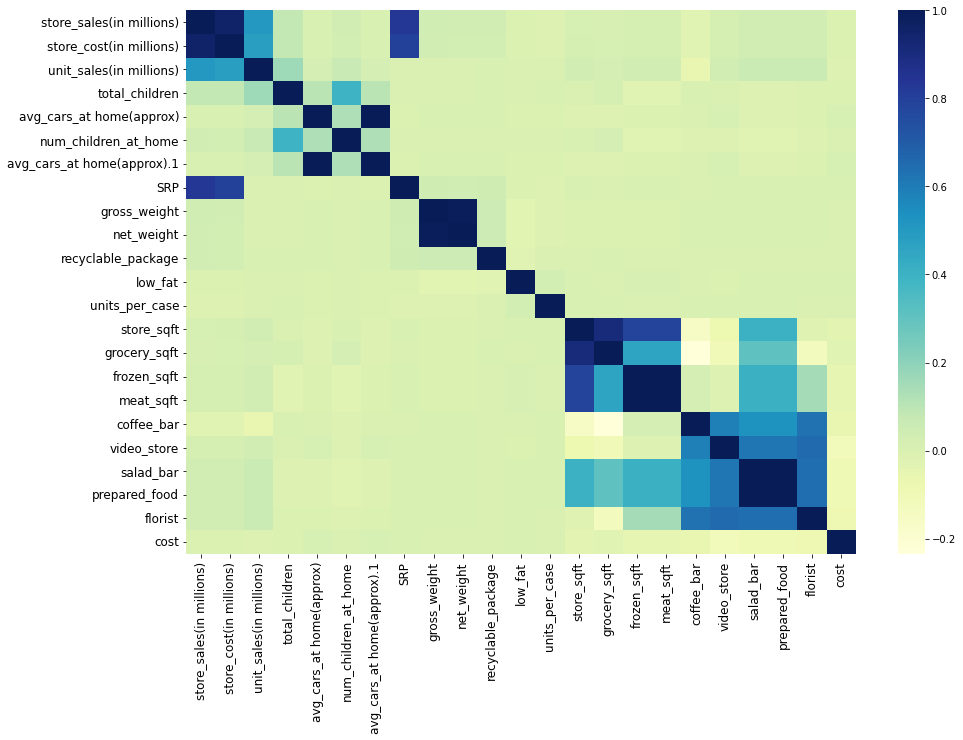

In [20]:
## drawing heatmap for the data
corr=df.corr()
plt.figure(figsize=(15,10))
ax=sns.heatmap(corr, cmap="YlGnBu")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.show()

Based on the heatmap,following observations are made:
### 1. Sales and Cost Relationships 
```store_sales(in millions)``` have a strong positive correlation with ```store_cost(in millions)``` approax(0.95), suggesting that as store sales increase, so do the associated costs.
### 2. Sales and Other Variables
```store_sales(in millions)``` also have postive correlation with various other variables like ```SRP(suggested retail price)``` and ```unit_sales(in millions)```
### 3. Square Footage and Categories
Store square footage(``store_sqft``) has a positive correlation and various categories such as ```grocery_sqft```, ```frozen_sqft``` and ```meat_sqft```. This suggests that dedicated stores tend to have more sapce for these categories

Now, we draw a histplot to visualize the frquencies of the datapoints with a specific costs

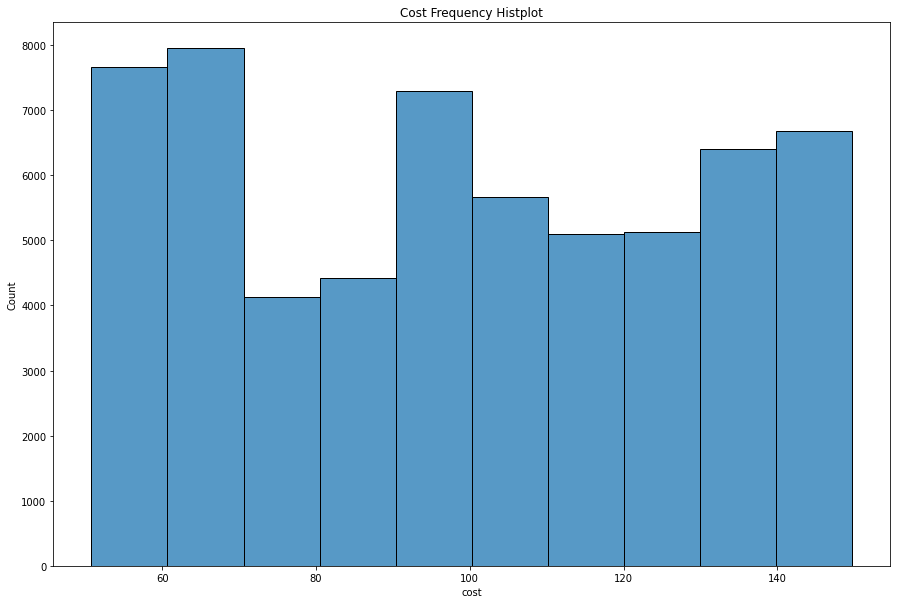

In [21]:
plt.figure(figsize=(15,10))
ax1=sns.histplot(df['cost'],bins=10)
ax1.set_title("Cost Frequency Histplot")
plt.show()

From the above representation of the histogram we can see that, the cost around 60(mn) has the maximum occurence in the data, which means,  the acquisition cost is around 60(mn) for maximum number of times, that is a little less than 8000 times. However, we can also see that 100(mn) also appears to have a fair frequency in our data, with more than 7000 times

<Figure size 1080x720 with 0 Axes>

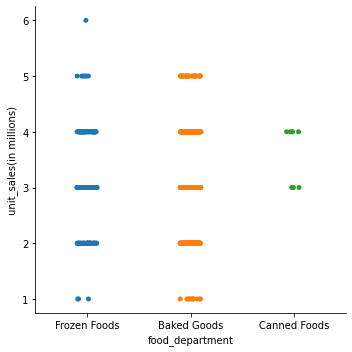

In [22]:
plt.figure(figsize=(15,10))
sns.catplot(data=df[:1000],x='food_department',y='unit_sales(in millions)')
plt.show()

From the above catplot we can see that,for Frozen Foods maximum number of data points lie between 2 to 4 million unit sales and are evenly spread. However, for Baked Goods, the data points seems to be evenly spread between 2 to 5 million unit sales. The data points for canned foods lie either in 3 or in 4 million unit sales.

In [23]:
fig=px.scatter_3d(df,x='store_sales(in millions)', y='store_cost(in millions)', z='cost',color='sales_country', template='plotly_dark')
fig.show()

In [24]:
#To check for duplicate counts
df.duplicated().value_counts()

False    60428
dtype: int64

From here we conclude that every row in the dataset is unique.

In [25]:
#To impute missing values
df.isnull().sum()

food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_sqft                  0
frozen_s

From above we see that no columns in the dataset inlclude null values

In [26]:
#collecting numerical columns
num_cols=[col for col in df.columns if df[col].dtypes!='object']
len(num_cols)

23

Now, we find the mean and standard deviation using scipy. This will give us a rough estimate of the average and spread of the data in each column 

In [37]:
##Change this to dataframe
import scipy
for col in num_cols:
    est=round((df[col].max()-df[col].min())/4) # range rule for std dev
    sd=round(scipy.stats.tstd(df[col]),3)
    print('The Estimated value for column ',col,' is : ',est)
    print('The standard deviation for ',col,' is ',sd)
    print()


The Estimated value for column  store_sales(in millions)  is :  6
The standard deviation for  store_sales(in millions)  is  3.463

The Estimated value for column  store_cost(in millions)  is :  2
The standard deviation for  store_cost(in millions)  is  1.453

The Estimated value for column  unit_sales(in millions)  is :  1
The standard deviation for  unit_sales(in millions)  is  0.828

The Estimated value for column  total_children  is :  1
The standard deviation for  total_children  is  1.49

The Estimated value for column  avg_cars_at home(approx)  is :  1
The standard deviation for  avg_cars_at home(approx)  is  1.11

The Estimated value for column  num_children_at_home  is :  1
The standard deviation for  num_children_at_home  is  1.303

The Estimated value for column  avg_cars_at home(approx).1  is :  1
The standard deviation for  avg_cars_at home(approx).1  is  1.11

The Estimated value for column  SRP  is :  1
The standard deviation for  SRP  is  0.933

The Estimated value for c

The difference of estimate and standard deviation is not significantly large, hence the data does not need to be scaled

In [28]:
# Calculating number of categorical coulmns

cat_cols=[cols for cols in df.columns if df[cols].dtypes=='object']
print(len(cat_cols))

17


Now, we use a column transformer

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder #Ordinal Encoder

from sklearn.tree import DecisionTreeRegressor

In [30]:
X=df.drop('cost',axis=1, inplace=False)
Y=df['cost']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

Here, we have split the data into train and test with a ratio of 20 to 80 percent 

In [31]:
## Check this Code

ct=ColumnTransformer([('Step1',OrdinalEncoder(),cat_cols)])

pipeline=Pipeline([('Coltf_step',ct),('Decision tree', DecisionTreeRegressor())])
pipeline.fit(X_train,Y_train)

Pipeline(steps=[('Coltf_step',
                 ColumnTransformer(transformers=[('Step1', OrdinalEncoder(),
                                                  ['food_category',
                                                   'food_department',
                                                   'food_family',
                                                   'promotion_name',
                                                   'sales_country',
                                                   'marital_status', 'gender',
                                                   'education', 'member_card',
                                                   'occupation', 'houseowner',
                                                   'avg. yearly_income',
                                                   'brand_name', 'store_type',
                                                   'store_city', 'store_state',
                                                   'media_type'])])),
                ('Decision tree', DecisionTreeRegressor())])

In [32]:
Pipeline(steps=[('Coltf_step',ColumnTransformer(transformers=[('Step1',OrdinalEncoder(),cat_cols)])),('Decision tree',DecisionTreeRegressor())])

Pipeline(steps=[('Coltf_step',
                 ColumnTransformer(transformers=[('Step1', OrdinalEncoder(),
                                                  ['food_category',
                                                   'food_department',
                                                   'food_family',
                                                   'promotion_name',
                                                   'sales_country',
                                                   'marital_status', 'gender',
                                                   'education', 'member_card',
                                                   'occupation', 'houseowner',
                                                   'avg. yearly_income',
                                                   'brand_name', 'store_type',
                                                   'store_city', 'store_state',
                                                   'media_type'])])),
                ('Decision tree', DecisionTreeRegressor())])

In [33]:
pipeline.score(X_train,Y_train)

1.0

In [34]:
pipeline.score(X_test,Y_test)

0.9983800649712323

### About the Pipeline
The pipeline is designed to preprocess and train a decision tree regressor model. The ```ColumnTransformer``` class allows us to apply different transformers to different columns of a dataset. Here, it is being used to create transformer ```Step1``` that uses the ```OrdinalEncoder()``` to encode the categorical variables. ```cat_cols``` is assumed to be a list of column names corresponding to categorical features in the dataset.

In coclusion, we are creating a pipeline that first encodes categorical features using an ```OrdinalEncoder``` and then trains a decison tree regressor model using the preprocessed data.